<a href="https://colab.research.google.com/github/mozey256/OSCAAR/blob/main/ML_training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df  = pd.read_csv('/content/ML_training_data.csv')

In [ ]:
# Perform one-hot encoding for the 'Synergy' column
df2 = pd.get_dummies(df, columns=['Synergy'], drop_first=True)

In [ ]:
df2.head()

,Drug 1,Drug2,Combination,0,1,2,3,4,5,6,...,Joint_Substructure_159,Joint_Substructure_160,Joint_Substructure_161,Joint_Substructure_162,Joint_Substructure_163,Joint_Substructure_164,Joint_Substructure_165,Joint_Substructure_166,Joint_Substructure_167,Synergy_Yes
0,2aminobenzothiazole,fluconazole,2aminobenzothiazole+fluconazole,0,0,1,1,1,1,1,...,2,0,0,2,2,2,1,2,0,False
1,2hydroxyethylhydrazine,fluconazole,2hydroxyethylhydrazine+fluconazole,0,0,1,2,1,2,2,...,2,0,0,2,1,1,2,1,0,False
2,3aminotriazole,fluconazole,3aminotriazole+fluconazole,0,1,2,1,1,1,1,...,2,0,0,2,2,1,1,2,0,False
3,4hydroxytamoxifene,fluconazole,4hydroxytamoxifene+fluconazole,1,1,1,1,1,1,1,...,2,1,1,2,2,2,2,2,0,False
4,A23187,fluconazole,A23187+fluconazole,1,1,2,1,1,1,1,...,2,1,1,2,2,2,2,2,0,False


In [ ]:
# Initialize PyCaret with your dataset
exp_reg = setup(df2, target='Synergy_Yes')

,Description,Value
0,Session id,5355
1,Target,Synergy_Yes
2,Target type,Regression
3,Original data shape,"(246, 1622)"
4,Transformed data shape,"(246, 1622)"
5,Transformed train set shape,"(172, 1622)"
6,Transformed test set shape,"(74, 1622)"
7,Numeric features,1618
8,Categorical features,3
9,Preprocess,True


In [ ]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2792,0.1406,0.3662,-0.0681,0.2591,0.7463,2.2360
et,Extra Trees Regressor,0.2961,0.1484,0.3741,-0.0728,0.2672,0.7628,2.3690
lr,Linear Regression,0.2978,0.1482,0.3750,-0.0812,0.2676,0.7674,2.8090
llar,Lasso Least Angle Regression,0.3057,0.1544,0.3835,-0.1217,0.2721,0.8140,2.2030
dummy,Dummy Regressor,0.3057,0.1544,0.3835,-0.1217,0.2721,0.8140,2.0320
en,Elastic Net,0.3057,0.1544,0.3835,-0.1217,0.2721,0.8140,2.2220
lasso,Lasso Regression,0.3057,0.1544,0.3835,-0.1217,0.2721,0.8140,2.2340
xgboost,Extreme Gradient Boosting,0.1749,0.1748,0.4001,-0.1863,0.2774,0.9416,3.0290
ada,AdaBoost Regressor,0.1748,0.1748,0.4001,-0.1864,0.2774,0.9417,2.1660
gbr,Gradient Boosting Regressor,0.1748,0.1748,0.4001,-0.1864,0.2774,0.9417,2.2430


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Example: Create a RandomForestRegressor model
rf_model = create_model('rf')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1111,0.1111,0.3333,0.2000,0.2311,0.6667
1,0.1667,0.1667,0.4082,-0.2000,0.2831,1.0000
2,0.2353,0.2353,0.4851,-0.3077,0.3363,1.0000
3,0.0588,0.0588,0.2425,-0.0625,0.1682,1.0000
4,0.4706,0.4706,0.6860,-0.8889,0.4756,1.0000
5,0.1765,0.1765,0.4201,-0.2143,0.2913,1.0000
6,0.0588,0.0588,0.2425,-0.0625,0.1682,1.0000
7,0.1765,0.1765,0.4201,-0.2143,0.2913,1.0000
8,0.1765,0.1765,0.4201,0.0192,0.2913,0.7500


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf_model = tune_model(rf_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2752,0.1335,0.3653,0.0391,0.2559,0.8098
1,0.2764,0.1320,0.3634,0.0494,0.2549,0.8010
2,0.3143,0.1746,0.4178,0.0299,0.2843,0.8101
3,0.2286,0.0771,0.2777,-0.3934,0.2165,0.8490
4,0.4790,0.3547,0.5956,-0.4238,0.3950,0.8541
5,0.2864,0.1410,0.3755,0.0296,0.2628,0.8093
6,0.2166,0.0706,0.2656,-0.2746,0.2057,0.8300
7,0.2894,0.1417,0.3764,0.0251,0.2641,0.8052
8,0.3143,0.1730,0.4159,0.0387,0.2830,0.8047


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


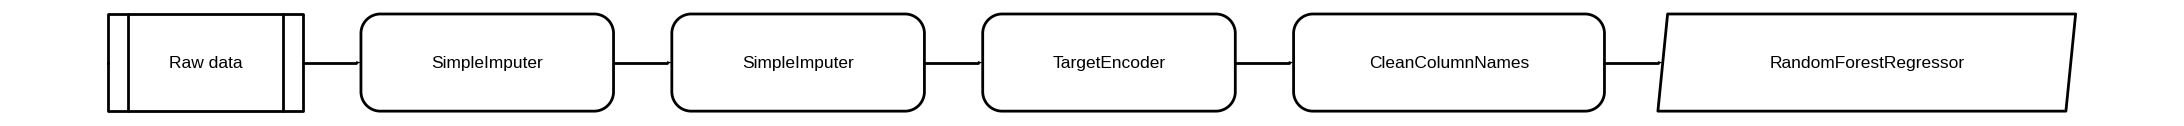

In [ ]:
evaluate_model(tuned_rf_model)


In [ ]:
# Perform one-hot encoding on Drug1, Drug2, and Combination columns
df_encoded = pd.get_dummies(df2, columns=['Drug 1', 'Drug2', 'Combination'])

# Split the data into features (X) and target (y)
X_encoded = df_encoded.drop(columns=['Synergy_Yes'])
y_encoded = df_encoded['Synergy_Yes']

# Split the data into training and testing sets (80% train, 20% test)
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model_encoded = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model_encoded.fit(X_train_encoded, y_train_encoded)

# Predict on the testing data
y_pred_encoded = rf_model_encoded.predict(X_test_encoded)

# Calculate accuracy
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
print("Accuracy with one-hot encoding:", accuracy_encoded)


Accuracy with one-hot encoding: 0.84


In [ ]:
X_test_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,Combination_geldanamycin+methylbenzethonium,Combination_geldanamycin+nikkomycin,Combination_geldanamycin+pentamidine_isethionate,Combination_geldanamycin+rapamycin,Combination_geldanamycin+rifamycin,Combination_geldanamycin+tautomycin,Combination_geldanamycin+thiabendazole,Combination_geldanamycin+tunicamycin,Combination_geldanamycin+valinomycin,Combination_geldanamycin+verrucarin
33,1,0,1,1,1,2,1,1,1,2,...,False,False,False,False,False,False,False,False,False,False
6,0,0,1,1,1,2,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
181,1,0,1,0,0,1,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
86,0,1,1,2,1,2,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
155,1,1,0,0,0,2,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# X contains features and y contains target
X = df2.drop(columns=['Synergy_Yes'])  # Features
y = df2['Synergy_Yes']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
test_data = X_test

# Generate predictions on the test data using the trained model
predictions = predict_model(tuned_rf_model, data=test_data)

In [ ]:
predictions

,Drug 1,Drug2,Combination,0,1,2,3,4,5,6,...,Joint_Substructure_159,Joint_Substructure_160,Joint_Substructure_161,Joint_Substructure_162,Joint_Substructure_163,Joint_Substructure_164,Joint_Substructure_165,Joint_Substructure_166,Joint_Substructure_167,prediction_label
33,castanospermine,fluconazole,castanospermine+fluconazole,1,0,1,1,1,2,1,...,2,1,0,2,1,2,2,2,0,0.174360
6,acifluorofen-methyl,fluconazole,acifluorofen-methyl+fluconazole,0,0,1,1,1,2,1,...,2,1,1,2,2,2,2,2,0,0.159203
181,fluspirilene,geldanamycin,fluspirilene+geldanamycin,1,0,1,0,0,1,0,...,2,1,1,2,1,2,2,2,0,0.180939
86,fluconazole,neomycin-sulfate,fluconazole+neomycin-sulfate,0,1,1,2,1,2,1,...,2,1,0,2,1,2,2,2,1,0.159250
155,camptothecin,geldanamycin,camptothecin+geldanamycin,1,1,0,0,0,2,0,...,2,2,2,2,1,2,2,2,0,0.175822
178,FK506,geldanamycin,FK506+geldanamycin,1,1,1,1,1,2,0,...,2,2,2,2,0,2,2,2,0,0.277186
194,geldanamycin,mastaparan,geldanamycin+mastaparan,1,1,0,0,0,2,0,...,2,2,2,2,0,1,2,1,0,0.236557
104,fluconazole,sodium-selenite,fluconazole+sodium-selenite,0,0,1,1,1,1,1,...,1,1,0,1,1,1,2,1,1,0.169616
9,alamethicin,fluconazole,alamethicin+fluconazole,0,0,2,1,1,2,1,...,2,1,1,2,2,2,2,2,0,0.214173
233,geldanamycin,tautomycin,geldanamycin+tautomycin,1,0,0,1,0,2,1,...,1,2,2,1,0,2,2,2,0,0.155263


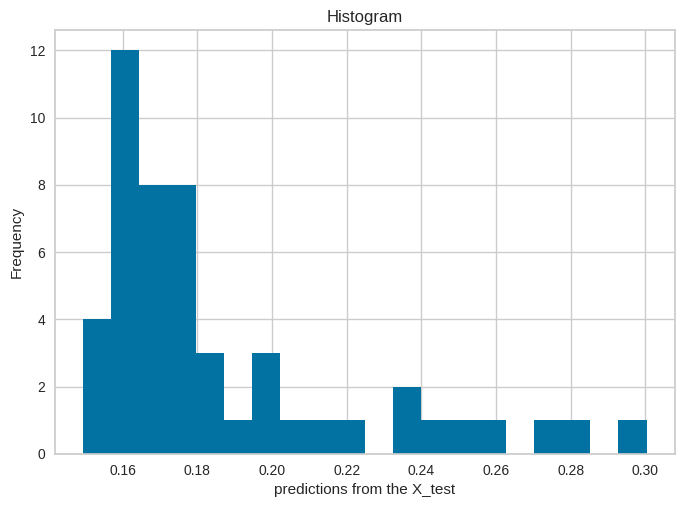

In [ ]:
# Histogram of a numeric column
plt.hist(predictions['prediction_label'], bins=20)
plt.xlabel('predictions from the X_test')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [ ]:
X_test.head()

,Drug 1,Drug2,Combination,0,1,2,3,4,5,6,...,Joint_Substructure_158,Joint_Substructure_159,Joint_Substructure_160,Joint_Substructure_161,Joint_Substructure_162,Joint_Substructure_163,Joint_Substructure_164,Joint_Substructure_165,Joint_Substructure_166,Joint_Substructure_167
33,castanospermine,fluconazole,castanospermine+fluconazole,1,0,1,1,1,2,1,...,2,2,1,0,2,1,2,2,2,0
6,acifluorofen-methyl,fluconazole,acifluorofen-methyl+fluconazole,0,0,1,1,1,2,1,...,2,2,1,1,2,2,2,2,2,0
181,fluspirilene,geldanamycin,fluspirilene+geldanamycin,1,0,1,0,0,1,0,...,1,2,1,1,2,1,2,2,2,0
86,fluconazole,neomycin-sulfate,fluconazole+neomycin-sulfate,0,1,1,2,1,2,1,...,2,2,1,0,2,1,2,2,2,1
155,camptothecin,geldanamycin,camptothecin+geldanamycin,1,1,0,0,0,2,0,...,2,2,2,2,2,1,2,2,2,0


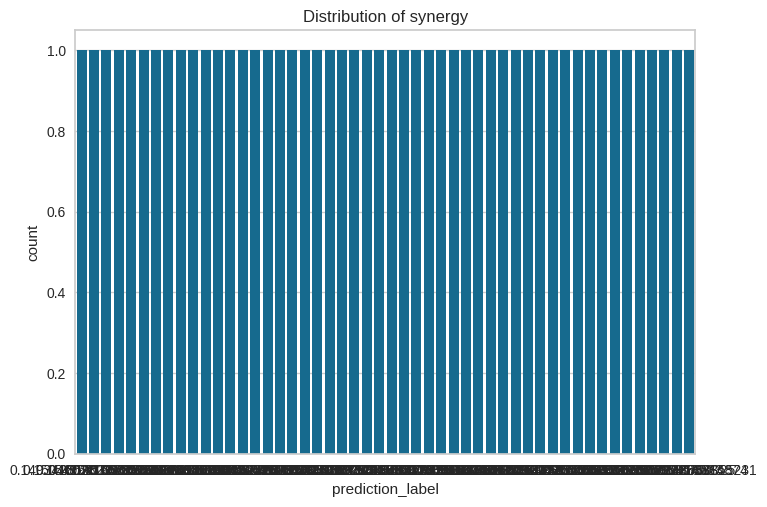

In [ ]:
# Distribution of the target variable
sns.countplot(x='prediction_label', data=predictions)
plt.title('Distribution of synergy')
plt.show()

In [ ]:
# Step 1: Create the Bayesian Ridge model
br_model = create_model('br')

# Step 2: Fine-tune the model using cross-validation
tuned_br_model = tune_model(br_model)

# Step 3: Evaluate the performance of the tuned model
evaluate_model(tuned_br_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2658,0.1173,0.3425,0.1555,0.2419,0.7096
1,0.2532,0.1171,0.3422,0.1570,0.2424,0.6819
2,0.2709,0.1402,0.3744,0.2210,0.2502,0.7166
3,0.2601,0.1176,0.3430,-1.1245,0.2679,0.9922
4,0.4601,0.3378,0.5812,-0.3557,0.3861,0.8120
5,0.2759,0.1356,0.3682,0.0672,0.2595,0.7509
6,0.2034,0.0630,0.2509,-0.1372,0.1959,0.7090
7,0.2812,0.1323,0.3637,0.0898,0.2576,0.7033
8,0.2940,0.1492,0.3863,0.1708,0.2628,0.7280


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2700,0.1194,0.3456,0.1400,0.2442,0.7212
1,0.2581,0.1185,0.3442,0.1469,0.2434,0.6998
2,0.2782,0.1443,0.3799,0.1979,0.2543,0.7289
3,0.2580,0.1131,0.3363,-1.0430,0.2632,0.9852
4,0.4601,0.3350,0.5788,-0.3445,0.3838,0.8121
5,0.2783,0.1351,0.3676,0.0703,0.2589,0.7545
6,0.2065,0.0638,0.2526,-0.1522,0.1974,0.7159
7,0.2828,0.1313,0.3624,0.0963,0.2566,0.7128
8,0.2968,0.1523,0.3903,0.1534,0.2653,0.7397


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
from pycaret.regression import *


# Initialize and fit the Bayesian Ridge model
br_model = create_model('br')
br_predictions = predict_model(br_model)

# Evaluate Bayesian Ridge model
evaluate_model(br_model)

# Initialize and fit the Extra Trees Regressor model
et_model = create_model('et')
et_predictions = predict_model(et_model)

# Evaluate Extra Trees Regressor model
evaluate_model(et_model)

# Initialize and fit the Linear Regression model
lr_model = create_model('lr')
lr_predictions = predict_model(lr_model)

# Evaluate Linear Regression model
evaluate_model(lr_model)

# Initialize and fit the Random Forest Regressor model
rf_model = create_model('rf')
rf_predictions = predict_model(rf_model)

# Evaluate Random Forest Regressor model
evaluate_model(rf_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2658,0.1173,0.3425,0.1555,0.2419,0.7096
1,0.2532,0.1171,0.3422,0.1570,0.2424,0.6819
2,0.2709,0.1402,0.3744,0.2210,0.2502,0.7166
3,0.2601,0.1176,0.3430,-1.1245,0.2679,0.9922
4,0.4601,0.3378,0.5812,-0.3557,0.3861,0.8120
5,0.2759,0.1356,0.3682,0.0672,0.2595,0.7509
6,0.2034,0.0630,0.2509,-0.1372,0.1959,0.7090
7,0.2812,0.1323,0.3637,0.0898,0.2576,0.7033
8,0.2940,0.1492,0.3863,0.1708,0.2628,0.7280


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.2695,0.1330,0.3646,0.0818,0.2595,0.7269


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2411,0.1017,0.3189,0.2677,0.2319,0.5467
1,0.2667,0.1362,0.3690,0.0196,0.2566,0.8367
2,0.3612,0.1782,0.4221,0.0097,0.2972,0.7550
3,0.2394,0.0770,0.2775,-0.3905,0.2189,0.8000
4,0.4776,0.3720,0.6100,-0.4934,0.4064,0.8800
5,0.3106,0.1431,0.3783,0.0155,0.2699,0.7767
6,0.2165,0.0696,0.2639,-0.2578,0.2046,0.8200
7,0.3406,0.1508,0.3884,-0.0378,0.2836,0.7433
8,0.2471,0.1477,0.3843,0.1793,0.2630,0.6600


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3235,0.1457,0.3817,-0.0062,0.2754,0.7623


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2491,0.1060,0.3256,0.2367,0.2383,0.5516
1,0.2804,0.1357,0.3684,0.0227,0.2590,0.8117
2,0.3501,0.1934,0.4398,-0.0751,0.3062,0.8194
3,0.2358,0.0756,0.2750,-0.3657,0.2165,0.8000
4,0.4813,0.3490,0.5908,-0.4009,0.3916,0.8442
5,0.2961,0.1419,0.3767,0.0238,0.2656,0.7973
6,0.2335,0.0749,0.2736,-0.3524,0.2151,0.8032
7,0.3100,0.1528,0.3909,-0.0516,0.2780,0.8216
8,0.2766,0.1432,0.3784,0.2041,0.2636,0.6186


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.2932,0.1445,0.3801,0.0024,0.2674,0.8154


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1111,0.1111,0.3333,0.2000,0.2311,0.6667
1,0.1667,0.1667,0.4082,-0.2000,0.2831,1.0000
2,0.2353,0.2353,0.4851,-0.3077,0.3363,1.0000
3,0.0588,0.0588,0.2425,-0.0625,0.1682,1.0000
4,0.4706,0.4706,0.6860,-0.8889,0.4756,1.0000
5,0.1765,0.1765,0.4201,-0.2143,0.2913,1.0000
6,0.0588,0.0588,0.2425,-0.0625,0.1682,1.0000
7,0.1765,0.1765,0.4201,-0.2143,0.2913,1.0000
8,0.1765,0.1765,0.4201,0.0192,0.2913,0.7500


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.1757,0.1757,0.4191,-0.2131,0.2906,1.0000


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [75]:
dfmld = pd.read_csv('/content/ML_training_data.csv')

In [77]:
# Separate features (X) and target (y)
X = dfmld.drop(columns=['Combination', 'Synergy'])  # Features
y = dfmld['Synergy']  # Target


In [78]:
# One-hot encode categorical features
categorical_cols = ['Drug 1', 'Drug2']
X_encoded = pd.get_dummies(X, columns=categorical_cols)


KeyError: "['Drug1'] not in index"

In [79]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train= sm.fit_resample(X_train, y_train)

In [80]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [88]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    clf = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(clf)

Classifier: Logistic Regression
Accuracy: 0.80
Precision: 0.68
Recall: 0.70
F1 Score: 0.69
[[35  6]
 [ 4  5]]
Classifier: Decision Tree
Accuracy: 0.68
Precision: 0.53
Recall: 0.54
F1 Score: 0.53
[[31 10]
 [ 6  3]]
Classifier: Random Forest
Accuracy: 0.84
Precision: 0.92
Recall: 0.56
F1 Score: 0.56
[[41  0]
 [ 8  1]]
Classifier: Gradient Boosting
Accuracy: 0.74
Precision: 0.49
Recall: 0.49
F1 Score: 0.49
[[36  5]
 [ 8  1]]
Classifier: SVM
Accuracy: 0.82
Precision: 0.41
Recall: 0.50
F1 Score: 0.45
[[41  0]
 [ 9  0]]
Classifier: k-NN
Accuracy: 0.80
Precision: 0.41
Recall: 0.49
F1 Score: 0.44
[[40  1]
 [ 9  0]]
